# An example about Logistic Regression

Sat -> Whether students get admitted or not

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

### Load data


In [2]:
raw_data = pd.read_csv("datasets/2.01. Admittance.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})

In [4]:
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Variables

In [5]:
y = data["Admitted"]
x1 = data["SAT"]

### Plot the data

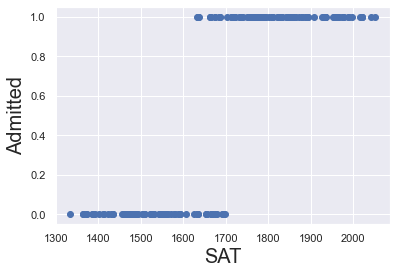

In [6]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

C:\Users\sw04cstl\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


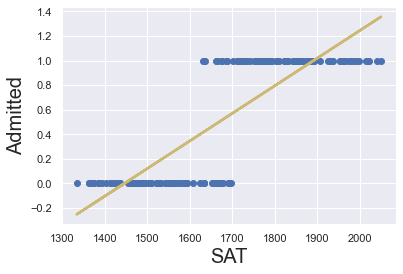

In [7]:
x = sm.add_constant(x1)
result = sm.OLS(y, x).fit()

y_hat = x1*result.params[1]+result.params[0]
plt.plot(x1, y_hat, lw=2.5, color='C8')

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

# Logistic and Logic Function

Assumption:
1. No endogeneity
2. Normality and homoscedascity
3. No autocorrelation
4. No multicollinearity

Logistic regression predicts the probability of an outcome occuring

Linear regression model y = B0 + B1x1 + B2x2 + ... + Bkxk + e

Logistic regression model p(X) = e^(B0+B1*x1+B2*x2+...)/(1+e^(B0+B1*x1+B2*x2+...))

Logit regression model odds = p(X)/(1-P(x)) = e^(B0 + B1x1 + B2x2 + ...)

log(odds) = B0 + B1x1 + B2x2 + ... (linear model with assumption e = 0)

## Building the logistic model

In [8]:
y = data["Admitted"]

In [9]:
x1 = data["SAT"]

### Regression

In [10]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
result = reg_log.fit()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


C:\Users\sw04cstl\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0.137766 is the value of the objective function at the 10th iteration. The probability that after a certain number of iterations, the model won't learn. max_iterations = 35

### Logistics summary

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.7992
Time:                        09:20:55   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Understanding the summary table

#### Maximum likelihood estimation (MLE)
Likelihood function: estimates how likely it is that the model at hand describes the real underlying relationship of the variables.
* The bigger the likelihood, the higher the probability that our model is correct.
* MLE tries to maximize the log likelihood function
* The computer is going through different values, until it finds a model, for which the log likelihood is biggest.
* When it cannot improve it, it will stop the optimization

LL null (log likelihood null): the log likelihood of a model which has no independent variables
y=B0

In [13]:
x0 = np.ones_like(x1.to_numpy())
null_reg_logit = sm.Logit(y, x0)
results_null_reg_logit = null_reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


In [14]:
results_null_reg_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:               7.410e-11
Time:                        09:22:03   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

<strong style="color:red;">Compare the log likelihood of the model and the LL null, see if the model has any explanatory power. In linear regression, there is an F test to test the explanatory power of the overall model. In logit regression, the log likelihood ratio (LLT) measures if our model is statistically different from LL-null (the useless model). Look at the p-value that is low, our model is significantly different.</strong>

#### Pseudo R-squared - Mc fadden's R squared
A good pseudo R-squared is somewhere between 0.2 and 0.4
* This measure is useful for comparing variations of the same model
* Different models will have completely different and comparable R-squared

#### Logit model: log(pi/(1-pi)) = -69.91 + 0.042 * SAT
* pi: is the propability that the event will occur 
* 1 - pi: is the probability that the event will not occur

* log(odds1) = -69.91 + 0.042*SAT1
* log(odds2) = -69.91 + 0.042*SAT2
    => log(odds2/odds1) = 0.042 * (SAT2 - SAT1)
* Difference of one unit of SAT: log(odds2/odds1) = 0.042 
    => odds2/odds1 = e^0.042 = 1.042 => odds2 = odds1*1.042
    


Thus, when the SAT score increases by 1, the odds of admittance increases by 4.2%

In general, <strong>delta_odds = e^bk<strong>

* Difference of 10 units of SAT: log(odds2/odds1) = 0.042*10
=> odds2 = 152% * odds1

# Binary predictors


In [5]:
raw_data = pd.read_csv('datasets/2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [6]:
raw_data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
raw_data['Gender'] = raw_data['Gender'].map({'Female': 1, 'Male': 0})
raw_data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


### Declare independent vars and dependent var


In [7]:
y = raw_data['Admitted']
x1 = raw_data['Gender']

### Logistic Regression

In [8]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y, x)
result = log_reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


C:\Users\sw04cstl\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.1659
Time:                        14:48:20   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

The model is significant (small LLR p-value) and gender variable is significant too (p=0.000)

* log(odds1) = -0.64 + 2.08 * Gender1
* log(odds2) = -0.64 + 2.08 * Gender2
* log(odds2/odds1) = 2.08 * (Gender2 - Gender1)
* If Gender2 = 1 (Female) and Gender1 = 0 (Male)
* log(odds_female/odds_male) = 2.08 
* odds_female = odds_male * 7.99
* Interpreted as: The odds of females to get admitted is equal to 7.99 times the odds of males to get admitted

# New regression with both predictors

In [9]:
y = raw_data['Admitted']
x1 = raw_data[['SAT', 'Gender']]

### Regression

In [13]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
result = log_reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


C:\Users\sw04cstl\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Jul 2022   Pseudo R-squ.:                  0.8249
Time:                        14:49:54   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<strong style="color: red">Much higher log likelihood (-20.180 > -96.140)</strong> => higher explanatory power to explain the relationship of different variables
* SAT is an outstanding predictor
* The Gender is still significant p_value = 0.022<0.05, but no longer the three 0

In [14]:
np.exp(1.9449)

6.992932526814459

<strong style="color: red">Given the same SAT, the female has 7 times higher odds to get admitted</strong>
* University quotas ... so:
* STEM -> predominantly male -> much easier for a female to get admitted

### Calculating the accuracy

In [17]:
np.set_printoptions(suppress=True)
result.predict() # those are the probability of being admitted

array([0.00000224, 0.99826407, 0.99999758, 0.22547027, 0.02483928,
       0.99224942, 0.99654421, 0.99996326, 0.9999712 , 0.01480318,
       0.99987581, 0.99995119, 0.76086765, 0.00000233, 0.59628381,
       0.999835  , 0.11444665, 0.11862645, 0.50514773, 0.99986531,
       0.99999937, 0.99999705, 0.00017194, 0.00561636, 0.9686638 ,
       0.99964461, 0.48485164, 0.99196278, 0.99982816, 0.99460902,
       0.00011503, 0.83258536, 0.24744937, 0.99999884, 0.99884729,
       0.99937274, 0.31271693, 0.99993245, 0.23263963, 0.00005297,
       0.01957396, 0.45452169, 0.99995696, 0.00000298, 0.99417883,
       0.00001777, 0.99391496, 0.00022936, 0.0003305 , 0.00689915,
       0.00424967, 0.99999966, 0.92395246, 0.02285698, 0.99999455,
       0.00000547, 0.36729546, 0.98270974, 0.11862645, 0.99681288,
       0.00442498, 0.78300154, 0.99999215, 0.99840562, 0.98472241,
       0.00004169, 0.00000594, 0.00136736, 0.99999897, 0.00004169,
       0.77602366, 0.11862645, 0.00094544, 0.9889125 , 0.99905

In [18]:
y.to_numpy()

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

<strong style="color: red">If 80% of the predicted values coincide with the actual values, we say the model is 80% accurate
</strong>

In [19]:
result.pred_table()

array([[69.,  5.],
       [ 4., 90.]])

In [21]:
cm_df = pd.DataFrame(result.pred_table(), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


<strong style="color: red">The confusion matrix: shows how confused the model is</strong>
* for 69 observations, the model predicted 0 and the actual value is 0
* for 90 observations, the model predicted 1 and the actual value is 1
* for 4 observations, the model predicted 0 and the actual value is 1
* for 5 observatiobs, the model predicted 1 and the actual value is 0
=> Overall, the model made an accurate prediction in 159 out of 168 cases = 94.6% of accuracy

### The concept of overfitting

* <strong style="color: red">Underfitting: The model does not capture the underlying logic of the data. No relationship to be found or need a different model</strong>
    + Low train accuracy
    + Low test accuracy
* <strong style="color: red">Overfitting: Our training has focused on the particular trainning set so much, it has missed the point. Due to the random noise it captures </strong>
    + High train accuracy
    + Low test accuracy

Solution to overfitting: split the dataset into two: trainning and test. Create a confusion matrix with the test data to measure the test accuracy

## Testing the model and assessing its accuracy on the testing data

In [41]:
test_data = pd.read_csv('datasets/2.03. Test dataset.csv')
test_data.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [42]:
test_data['Admitted'] = test_data['Admitted'].map({'Yes': 1, 'No': 0})
test_data['Gender'] = test_data['Gender'].map({'Female': 1, 'Male': 0})
test_data

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


1. We will use our model to make predictions on our test data
2. We will compare those with the actual value
3. Calculate the accuracy
4. Confusion matrix

In [44]:
test_inputs = test_data.drop('Admitted', axis=1)

In [45]:
test_inputs= sm.add_constant(test_inputs)
test_inputs

C:\Users\sw04cstl\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [46]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [47]:
test_actual = test_data['Admitted']


In [53]:
def confusion_matrix(data, actual_values, model):
    pre_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pre_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
    
    return cm, accuracy

In [54]:
confusion_matrix(test_inputs, test_actual, result)

(array([[ 5.,  1.],
        [ 1., 12.]]),
 0.8947368421052632)

<strong style="color: red">The overall accuracy is 0.89</strong>

In [55]:
print('Missclassification rate', str(2/19))

Missclassification rate 0.10526315789473684
